In [74]:
import pandas as pd
import numpy as np

In [75]:
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    # Radius of the Earth in kilometers (mean value)
    R = 6371
    
    # Calculate the distance
    distance = R * c
    return distance


In [76]:
# Load the earthquake data from the CSV file using pandas
earthquake_data = pd.read_csv(r'C:\Users\MUSA\Downloads\IEB_export.csv')

In [77]:
# Site coordinates (replace with your site's latitude and longitude)
site_latitude = 33.9871
site_longitude = 71.5388

In [78]:
# Calculate the distance for each earthquake in the dataset
earthquake_data['Distance_from_site'] = haversine(site_latitude, site_longitude, earthquake_data['Lat'], earthquake_data['Lon'])

# Display the resulting DataFrame with distances
print(earthquake_data[['Mag', 'Lat', 'Lon', 'Distance_from_site']])

     Mag      Lat      Lon  Distance_from_site
0    4.4  33.7716  71.0951           47.454693
1    4.1  33.7854  72.7967          118.259632
2    4.4  33.5931  72.8907          132.389386
3    4.4  33.5419  72.1350           74.080930
4    4.8  33.2832  70.5607          119.689012
..   ...      ...      ...                 ...
249  5.3  33.4532  71.4983           59.485020
250  4.8  33.1272  70.1423          160.893627
251  4.8  33.9487  72.8622          122.117230
252  4.3  34.1409  70.5331           94.205190
253  4.9  33.9073  72.7158          108.930266

[254 rows x 4 columns]


In [79]:
pd.DataFrame.to_csv('earthquake_data_with_distances.csv', index=False)

AttributeError: 'str' object has no attribute 'to_frame'

In [ ]:
import os

# Print the current working directory before saving the file
current_directory_before = os.getcwd()
print("Current working directory before saving:", current_directory_before)

# Save the file
earthquake_data.to_csv('earthquake_data_with_distances.csv', index=False)

# Print the current working directory after saving the file
current_directory_after = os.getcwd()
print("Current working directory after saving:", current_directory_after)


Current working directory before saving: c:\Users\MUSA\AppData\Local\Programs\Microsoft VS Code
Current working directory after saving: c:\Users\MUSA\AppData\Local\Programs\Microsoft VS Code


In [ ]:
import pandas as pd
import simplekml

# Load the CSV file with latitude and longitude data
csv_file = r'C:\Users\MUSA\AppData\Local\Programs\Microsoft VS Code\earthquake_data_with_distances.csv'  # Replace with the path to your CSV file
data = pd.read_csv(csv_file)



In [ ]:
# Create a KML object
kml = simplekml.Kml()

# Iterate through the CSV data and create KML placemarks for each data point
for index, row in data.iterrows():
    lat = row['Lat']  # Replace 'Latitude' with the column name in your CSV
    lon = row['Lon']  # Replace 'Longitude' with the column name in your CSV
    name = row['Year']  # Replace 'Name' with the column name for the placemark name

    # Create a placemark
    kml.newpoint(name=name, coords=[(lon, lat)])

# Save the KML file
kml_file = 'output.kml'  # Replace with the desired output KML file name
kml.save(kml_file)

print(f'CSV data converted to KML and saved to {kml_file}')


CSV data converted to KML and saved to output.kml


In [ ]:
import pandas as pd
from datetime import datetime, timedelta


In [ ]:
# Load the CSV file with earthquake data
csv_file = r'C:\Users\MUSA\AppData\Local\Programs\Microsoft VS Code\earthquake_data_with_distances.csv'  
df = pd.read_csv(csv_file)



In [ ]:
# Combine year, month, day, and time columns into a single datetime column
df['Timestamp'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Sort the data by magnitude and timestamp
df.sort_values(['Mag', 'Timestamp'], inplace=True)

In [ ]:
# Define a function to filter earthquakes with less than 3 days gap between them
def filter_clusters(group):
    gaps = group['Timestamp'].diff()
    return group[gaps > timedelta(days=3)] if not group.empty else group

In [ ]:


# Apply the filter_clusters function to each magnitude group
filtered_df = df.groupby('Mag', group_keys=False, as_index=False).apply(filter_clusters)

# Save the filtered data to a new CSV file
output_csv_file = 'filtered_earthquake_data.csv'  # Replace with the desired output CSV file name
filtered_df.to_csv(output_csv_file, index=False)

print(f'Filtered earthquake data saved to {output_csv_file}')


Filtered earthquake data saved to filtered_earthquake_data.csv


In [ ]:
def count_earthquakes(group):
    group['Count'] = len(group)
    return group

In [ ]:
# Apply the count_earthquakes function to each magnitude group
df = df.groupby('Mag').apply(count_earthquakes)

# Save the updated data to a new CSV file
output_csv_file = 'earthquake_data_with_count.csv'  # Replace with the desired output CSV file name
df.to_csv(output_csv_file, index=False)

print(f'Earthquake data with count saved to {output_csv_file}')

Earthquake data with count saved to earthquake_data_with_count.csv


In [ ]:
# Sort the data by timestamp in descending order (youngest on top)
df.sort_values(by='Timestamp', ascending=False, inplace=True)

# Save the updated data to a new CSV file
output_csv_file = 'earthquake_data_sorted.csv'  # Replace with the desired output CSV file name
df.to_csv(output_csv_file, index=False)

In [ ]:

import matplotlib.pyplot as plt

# Load the Excel file
excel_file = 'Magnitudes.xlsx'  # Replace with the path to your Excel file
df = pd.read_excel(excel_file, engine='openpyxl')


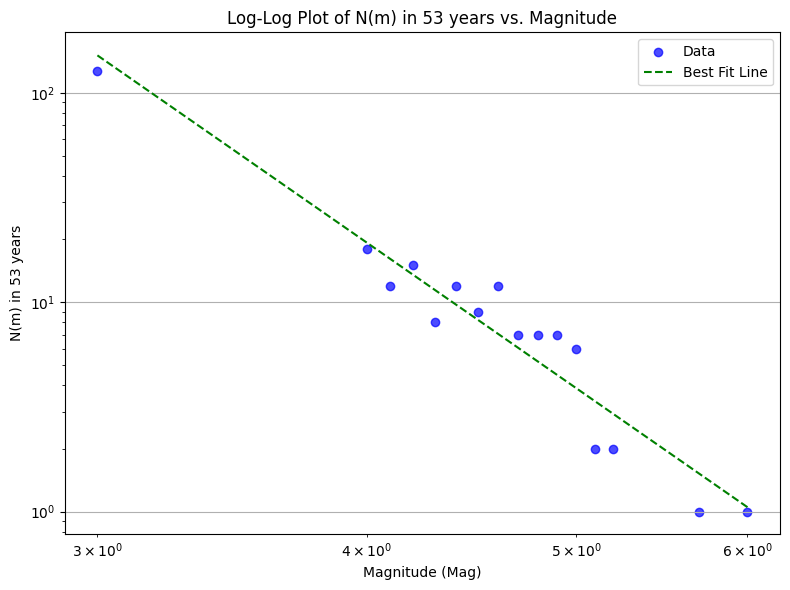

In [67]:
from scipy.stats import linregress

In [92]:
def gutenberg_richter(m, a, b):
    return a - b * m

In [93]:
from scipy.optimize import curve_fit

Constants (a, b) of Gutenberg-Richter formula: a=5.60, b=7.17
the equation of Gutenberg-Richter relationship is 5.602891889422651 - 7.173756580871263 * Mag
Standard Deviation of the fit: 0.14


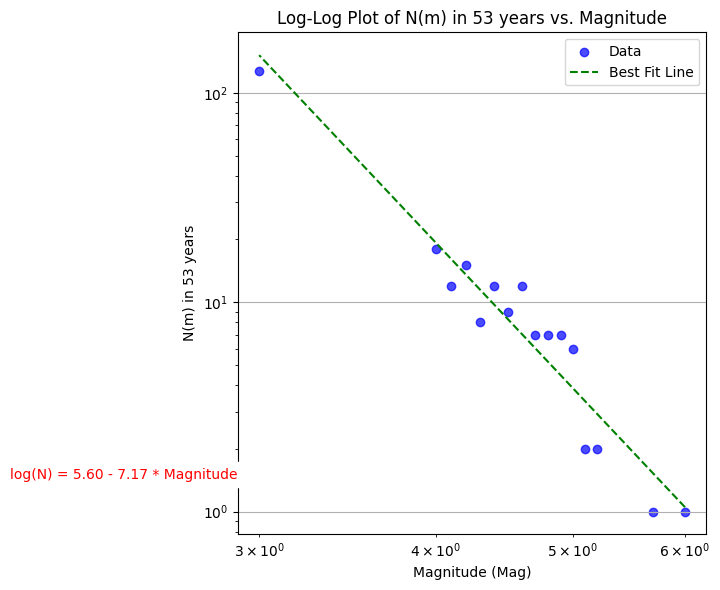

In [105]:

# Fit the Gutenberg-Richter function to the data
params, covariance = curve_fit(gutenberg_richter, x_log, y_log)

# Extract the constants a and b
a, b = params

# Calculate the standard deviation
residuals = y_log - gutenberg_richter(x_log, a, b)
std_deviation = np.std(residuals)


# Select the columns for the x and y axes
x = df['Mag']
y = df['N(m) in 53 years']


x_log = np.log10(x)
y_log = np.log10(y)
slope, intercept, r_value, p_value, std_err = linregress(x_log, y_log)

# Calculate the regression line
regression_line = (10**intercept) * (x**slope)

# Create a log-log plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, marker='o', color='blue', alpha=0.7, label='Data')
plt.plot(x, regression_line, color='green', linestyle='--', label='Best Fit Line')
plt.xscale('log')
plt.yscale('log')


# Customize the plot labels and title
plt.xlabel('Magnitude (Mag)')
plt.ylabel('N(m) in 53 years')
plt.title('Log-Log Plot of N(m) in 53 years vs. Magnitude')


# Output the results
print(f"Constants (a, b) of Gutenberg-Richter formula: a={a:.2f}, b={b:.2f}")
print(f"the equation of Gutenberg-Richter relationship is {a} - {b} * Mag")
print(f"Standard Deviation of the fit: {std_deviation:.2f}")

equation_text = f'log(N) = {a:.2f} - {abs(b):.2f} * Magnitude'
plt.text(2, 1.5, equation_text, fontsize=10, color='red', backgroundcolor='white', verticalalignment='center')


# Show the legend
plt.legend()




# Show the plot or save it to a file
plt.grid(True)
plt.tight_layout()
plt.show()


In [110]:


# Read the CSV file into a pandas DataFrame
data = pd.read_csv(r'C:\Users\MUSA\AppData\Local\Programs\Microsoft VS Code\earthquake_data_with_distances.csv')

# Extract the values of R as a list
R_values = data["Distance_from_hypocenter"].tolist()

print(R_values)

[73.17402439, 118.6816769, 135.924941, 81.38595807, 126.5815931, 109.2935025, 102.2302604, 60.61439116, 135.3072697, 137.6700099, 66.97406798, 95.33237948, 22.40312876, 112.2804443, 137.601841, 115.8624495, 146.0690499, 123.7703554, 145.1070919, 121.7724348, 107.5597443, 177.3341743, 148.4922756, 97.95422093, 165.8802048, 88.89441236, 68.98062461, 35.90214636, 110.466902, 209.8396829, 188.9189739, 115.7808681, 197.0934447, 66.27120626, 130.7087169, 198.2453829, 83.55101148, 150.193212, 128.382139, 110.6322702, 173.734669, 115.9791656, 101.4625193, 103.7604366, 130.0526425, 82.56823201, 100.4579651, 90.57361507, 45.84981383, 102.3235596, 122.6983096, 63.50656637, 110.2836218, 61.02532241, 157.8706388, 166.4813451, 45.95253632, 108.0160227, 112.8174095, 61.24149307, 149.2972774, 65.33663467, 168.4115848, 79.7724258, 133.0367481, 50.85527699, 137.1059091, 89.15764806, 116.5509367, 155.8638163, 96.23367977, 110.4004296, 150.4593853, 125.3625133, 133.7256025, 131.8001344, 144.6364692, 65.77

In [229]:
import math
import pandas as pd

# Define the coefficients
a = -0.496
b = 2.730
c1 = -0.00315
c2 = -0.425
c3 = 0.294
c4 = 100
d1 = -0.00208
d2 = -0.647
d3 = 0.107
d4 = 100

# Define the earthquake parameters
M = 5 # moment magnitude
Yref = 1 # reference value of the ground motion parameter
Delta = Yref-M # difference between the reference magnitude and the moment magnitude



In [230]:

# Calculate the PGA values for each magnitude
PGA_list = []

PGA_values = []
for R in R_values:
    lnY = a + b*M - math.log(R) + c1*(math.sqrt(R**2 + c4**2) - R) + (c2 + c3*math.log(Yref))*Delta + d1*(math.sqrt(R**2 + d4**2) - R) + (d2 + d3*math.log(Yref))*Delta**2
    Y = math.exp(lnY)
    PGA_values.append(Y)
    PGA_list.append(PGA_values)

In [231]:
# Fit a polynomial curve to the data
p = np.polyfit(R_List, PGA_values, 1)
y_fit = np.polyval(p, R_values)

# Plot the data and the fitted curve
plt.scatter(R_List, PGA_values)
plt.plot(R_List, y_fit, color='r', linestyle='--')

plt.xlabel("Hypocentral Distance")
plt.ylabel("PGA Values")
plt.title("Polynomial regression for Campbell-Bozorgnia (2014) GMPE")
plt.show()

TypeError: expected x and y to have same length

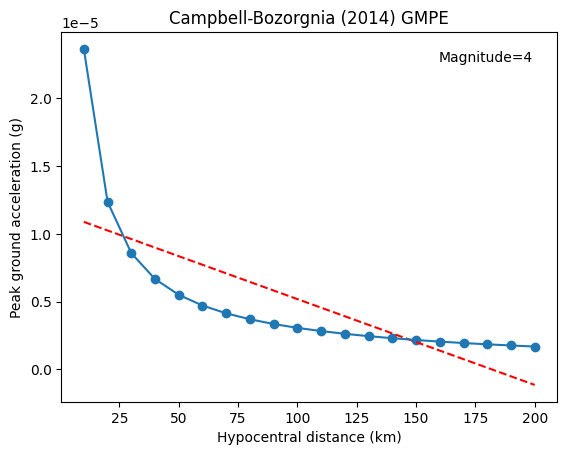

In [237]:
import math
import pandas as pd
import matplotlib.pyplot as plt

# Define the coefficients
a = -0.496
b = 2.730
c1 = -0.00315
c2 = -0.425
c3 = 0.294
c4 = 100
d1 = -0.00208
d2 = -0.647
d3 = 0.107
d4 = 100


# Define the earthquake parameters
M = 4 # moment magnitude
Yref = 1.0 # reference value of the ground motion parameter
Delta = Yref+M # difference between the reference magnitude and the moment magnitude
R_List=[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
# Calculate the ground motion parameter for each value of R
PGA_values = []
for R in R_List:
    lnY = a + b*M - math.log(R) + c1*(math.sqrt(R**2 + c4**2) - R) + (c2 + c3*math.log(Yref))*Delta + d1*(math.sqrt(R**2 + d4**2) - R) + (d2 + d3*math.log(Yref))*Delta**2
    Y = math.exp(lnY)
    PGA_values.append(Y)

# Fit a polynomial curve to the data
p = np.polyfit(R_List, PGA_values, 1)
y_fit = np.polyval(p, R_List)

# Plot the data and the fitted curve
plt.scatter(R_List, PGA_values)
plt.plot(R_List, y_fit, color='r', linestyle='--')


# Add text to the top right corner of the graph
plt.text(0.95, 0.95, "Magnitude={}".format(M), ha='right', va='top', transform=plt.gca().transAxes)

# Plot the results
plt.plot(R_List, PGA_values)
plt.xlabel("Hypocentral distance (km)")
plt.ylabel("Peak ground acceleration (g)")
plt.title("Campbell-Bozorgnia (2014) GMPE")
plt.show()

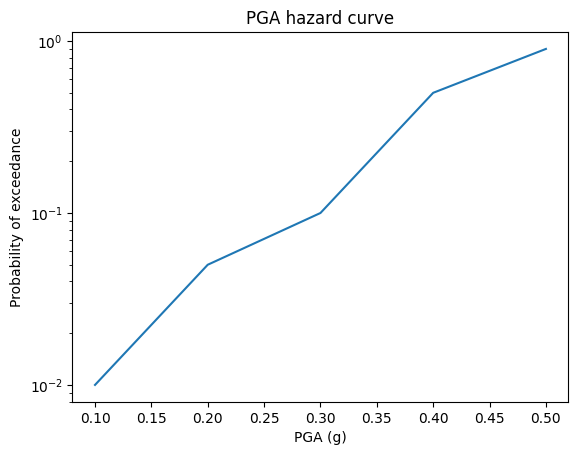

In [239]:
import matplotlib.pyplot as plt

# Collect the PGA values and their corresponding probabilities of exceedance
PGA_values = [0.1, 0.2, 0.3, 0.4, 0.5]
prob_exceedance = [0.01, 0.05, 0.1, 0.5, 0.9]

# Plot the PGA hazard curve
plt.semilogy(PGA_values, prob_exceedance)

plt.xlabel("PGA (g)")
plt.ylabel("Probability of exceedance")
plt.title("PGA hazard curve")

plt.show()